In [2]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [7]:
(X_train , y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [8]:
len(X_train) , len(X_test)

(60000, 10000)

In [11]:
X_train[0].shape

(28, 28)

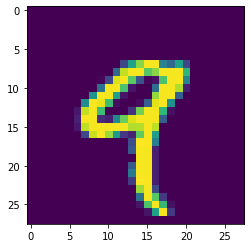

In [15]:
plt.imshow(X_train[4])

In [16]:
y_train[4]

9

In [18]:
X_train.shape

(60000, 28, 28)

In [20]:
len(X_train)

60000

In [29]:
X_train = X_train / 255
X_test = X_test / 255

In [30]:
X_train_flattened =  X_train.reshape(len(X_train),(28*28))
X_test_flattened =  X_test.reshape(len(X_test),(28*28))

In [31]:
X_train_flattened.shape,X_test_flattened.shape

((60000, 784), (10000, 784))

In [32]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [48]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid')    
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4665 - accuracy: 0.8800
Epoch 2/5
1875/1875 [==============================] - 2s 941us/step - loss: 0.3037 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 2s 954us/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9258


In [49]:
model.evaluate(X_test_flattened , y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2673 - accuracy: 0.9249


[0.26725584268569946, 0.9248999953269958]

In [66]:
y_predicted = model.predict(X_test_flattened)

y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

sns.heatmap(cm,annot=True,fmt='d',cbar=None)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    0,    1,    0,    1,    5,    1,    1,    0],
       [   0, 1123,    4,    0,    0,    0,    2,    1,    5,    0],
       [   9,    1, 1001,    2,    1,    1,    2,    6,    9,    0],
       [   2,    0,    1,  986,    0,    4,    0,    7,    7,    3],
       [   1,    1,    0,    1,  943,    0,    9,    3,    3,   21],
       [   3,    0,    0,    7,    0,  872,    5,    0,    4,    1],
       [   8,    3,    0,    0,    1,    4,  942,    0,    0,    0],
       [   1,    5,    8,    2,    0,    0,    0,  999,    3,   10],
       [  13,    0,    1,    4,    1,    4,    4,    3,  942,    2],
       [   2,    5,    0,    6,    4,    5,    1,    5,    3,  978]])>

In [67]:
np.argmax(y_predicted[0])

7

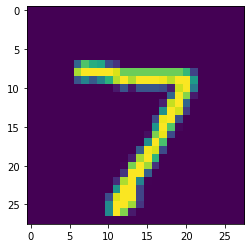

In [68]:
plt.imshow(X_test[0])

In [64]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train_flattened, y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2659 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1195 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0846 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0649 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0517 - accuracy: 0.9841


In [65]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0779 - accuracy: 0.9757


[0.07790214568376541, 0.9757000207901001]

<AxesSubplot:>

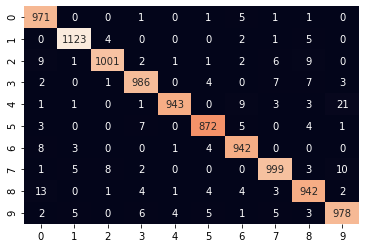

In [69]:
y_predicted = model.predict(X_test_flattened)

y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

sns.heatmap(cm,annot=True,fmt='d',cbar=None)

In [70]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train , epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2709 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1202 - accuracy: 0.9646
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0843 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0644 - accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0505 - accuracy: 0.9843


In [71]:
model.evaluate(X_test , y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0737 - accuracy: 0.9763


[0.0736769363284111, 0.9763000011444092]